<a href="https://colab.research.google.com/github/Neumi/3Dreconstruction/blob/master/feature_matching_cv2_video_featuring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! mkdir input
! mkdir output

In [1]:
!git clone https://github.com/Neumi/3Dreconstruction

Cloning into '3Dreconstruction'...
remote: Enumerating objects: 2751, done.
remote: Total 2751 (delta 0), reused 0 (delta 0), pack-reused 2751
Receiving objects: 100% (2751/2751), 102.21 MiB | 22.28 MiB/s, done.
Resolving deltas: 100% (269/269), done.
Checking out files: 100% (2401/2401), done.


In [0]:
! cp 3Dreconstruction/img2/IMG_1689.mov /content/

In [0]:
! rm -r vidframes/
! mkdir vidframes
! mkdir vidframes/featured

In [0]:
def detectAndDescribe(image, method=None):
    """
    Compute key points and feature descriptors using an specific method
    """
    
    assert method is not None, "You need to define a feature detection method. Values are: 'sift', 'surf'"
    
    # detect and extract features from the image
    if method == 'sift':
        descriptor = cv2.xfeatures2d.SIFT_create()
    elif method == 'surf':
        descriptor = cv2.xfeatures2d.SURF_create()
    elif method == 'brisk':
        descriptor = cv2.BRISK_create()
    elif method == 'orb':
        descriptor = cv2.ORB_create()
        
    # get keypoints and descriptors
    (kps, features) = descriptor.detectAndCompute(image, None)
    
    return (kps, features)

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
cv2.ocl.setUseOpenCL(False)


# select the image id (valid values 1,2,3, or 4)
imageId = 1
feature_extractor = 'brisk'
feature_matching = 'bf'


vidcap = cv2.VideoCapture('IMG_1694.MOV')
success,image = vidcap.read()
count = 0

while success:
  imgName = "frame%s.jpg" % str(count).zfill(3)
  imgPath = "vidframes/" + imgName

  cv2.imwrite(imgPath, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read and process a new frame: ', success , " " , imgName)
  count += 1

  trainImg = cv2.imread(imgPath)
  trainImg = cv2.cvtColor(trainImg,cv2.COLOR_BGR2RGB)
  trainImg_gray = cv2.cvtColor(trainImg, cv2.COLOR_RGB2GRAY)

  kpsA, featuresA = detectAndDescribe(trainImg_gray, method=feature_extractor)

  fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(20,8), constrained_layout=False)
  # cv2.drawKeypoints(trainImg_gray,kpsA,None,color=(0,255,0))
  ax1.imshow(cv2.drawKeypoints(trainImg_gray,kpsA,None,color=(0,255,0)))

  plt.savefig("vidframes/featured/" + imgName, bbox_inches='tight', 
              dpi=300, optimize=True, format='jpeg')
  plt.close()


Read and process a new frame:  True   frame000.jpg
Read and process a new frame:  True   frame001.jpg
Read and process a new frame:  True   frame002.jpg
Read and process a new frame:  True   frame003.jpg
Read and process a new frame:  True   frame004.jpg
Read and process a new frame:  True   frame005.jpg
Read and process a new frame:  True   frame006.jpg
Read and process a new frame:  True   frame007.jpg
Read and process a new frame:  True   frame008.jpg
Read and process a new frame:  True   frame009.jpg
Read and process a new frame:  True   frame010.jpg
Read and process a new frame:  True   frame011.jpg
Read and process a new frame:  True   frame012.jpg
Read and process a new frame:  True   frame013.jpg
Read and process a new frame:  True   frame014.jpg
Read and process a new frame:  True   frame015.jpg
Read and process a new frame:  True   frame016.jpg
Read and process a new frame:  True   frame017.jpg
Read and process a new frame:  True   frame018.jpg
Read and process a new frame:  

In [49]:
import cv2
import numpy as np
import glob
import os

img_array = []
#for filename in glob.glob('./vidframes/featured/*.jpg'):
filelist = glob.glob(os.path.join('./vidframes/featured/*.jpg'))

for infile in sorted(filelist):
  print(infile)
  img = cv2.imread(infile)
  height, width, layers = img.shape
  size = (width,height)
  img_array.append(img)

out = cv2.VideoWriter('out2.mp4',cv2.VideoWriter_fourcc(*'MP4V'), 15, size)

for i in range(len(img_array)):
  out.write(img_array[i])
out.release()

./vidframes/featured/frame000.jpg
./vidframes/featured/frame001.jpg
./vidframes/featured/frame002.jpg
./vidframes/featured/frame003.jpg
./vidframes/featured/frame004.jpg
./vidframes/featured/frame005.jpg
./vidframes/featured/frame006.jpg
./vidframes/featured/frame007.jpg
./vidframes/featured/frame008.jpg
./vidframes/featured/frame009.jpg
./vidframes/featured/frame010.jpg
./vidframes/featured/frame011.jpg
./vidframes/featured/frame012.jpg
./vidframes/featured/frame013.jpg
./vidframes/featured/frame014.jpg
./vidframes/featured/frame015.jpg
./vidframes/featured/frame016.jpg
./vidframes/featured/frame017.jpg
./vidframes/featured/frame018.jpg
./vidframes/featured/frame019.jpg
./vidframes/featured/frame020.jpg
./vidframes/featured/frame021.jpg
./vidframes/featured/frame022.jpg
./vidframes/featured/frame023.jpg
./vidframes/featured/frame024.jpg
./vidframes/featured/frame025.jpg
./vidframes/featured/frame026.jpg
./vidframes/featured/frame027.jpg
./vidframes/featured/frame028.jpg
./vidframes/fe

In [17]:
#! curl -o input/foto1B.jpg http://hugin.sourceforge.net/tutorials/two-photos/974-1.jpg
#! curl -o input/foto1A.jpg http://hugin.sourceforge.net/tutorials/two-photos/975-1.jpg

! curl -o input/foto1A.jpg https://miro.medium.com/max/480/0*57hxWhgcC3ipkFe8.jpg
! curl -o input/foto1B.jpg https://miro.medium.com/max/480/0*-JGkWeLlsGeiPxv0.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 76673  100 76673    0     0   166k      0 --:--:-- --:--:-- --:--:--  166k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 75017  100 75017    0     0  1017k      0 --:--:-- --:--:-- --:--:-- 1017k


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
cv2.ocl.setUseOpenCL(False)

In [0]:
# select the image id (valid values 1,2,3, or 4)
imageId = 1
feature_extractor = 'brisk'
feature_matching = 'bf'

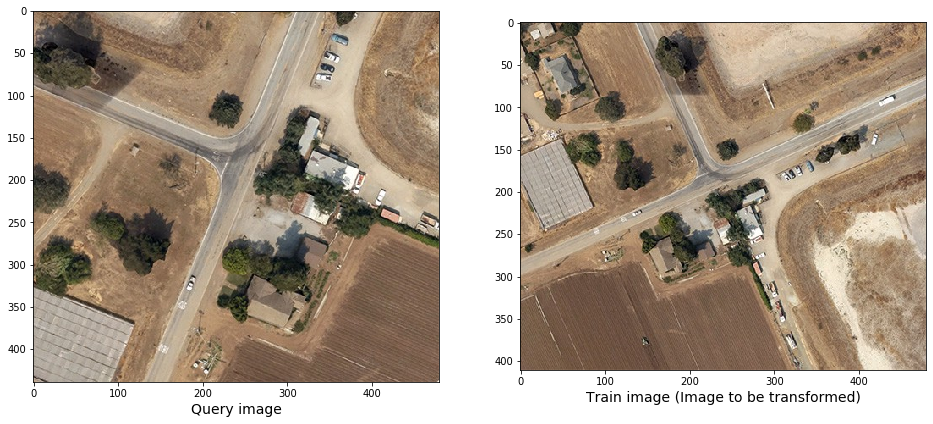

In [20]:
# read images and transform them to grayscale
# Make sure that the train image is the image that will be transformed
trainImg = cv2.imread('./input/foto' + str(imageId) + 'A.jpg')
trainImg = cv2.cvtColor(trainImg,cv2.COLOR_BGR2RGB)
trainImg_gray = cv2.cvtColor(trainImg, cv2.COLOR_RGB2GRAY)

queryImg = cv2.imread('input/foto' + str(imageId) + 'B.jpg')
# Opencv defines the color channel in the order BGR. 
# Transform it to RGB to be compatible to matplotlib
queryImg = cv2.cvtColor(queryImg,cv2.COLOR_BGR2RGB)
queryImg_gray = cv2.cvtColor(queryImg, cv2.COLOR_RGB2GRAY)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(queryImg, cmap="gray")
ax1.set_xlabel("Query image", fontsize=14)

ax2.imshow(trainImg, cmap="gray")
ax2.set_xlabel("Train image (Image to be transformed)", fontsize=14)

plt.savefig("./output/input_img_"+str(imageId)+'.jpeg', bbox_inches='tight', dpi=300, optimize=True, format='jpeg')

plt.show()

In [0]:
def detectAndDescribe(image, method=None):
    """
    Compute key points and feature descriptors using an specific method
    """
    
    assert method is not None, "You need to define a feature detection method. Values are: 'sift', 'surf'"
    
    # detect and extract features from the image
    if method == 'sift':
        descriptor = cv2.xfeatures2d.SIFT_create()
    elif method == 'surf':
        descriptor = cv2.xfeatures2d.SURF_create()
    elif method == 'brisk':
        descriptor = cv2.BRISK_create()
    elif method == 'orb':
        descriptor = cv2.ORB_create()
        
    # get keypoints and descriptors
    (kps, features) = descriptor.detectAndCompute(image, None)
    
    return (kps, features)

In [0]:
kpsA, featuresA = detectAndDescribe(trainImg_gray, method=feature_extractor)
kpsB, featuresB = detectAndDescribe(queryImg_gray, method=feature_extractor)

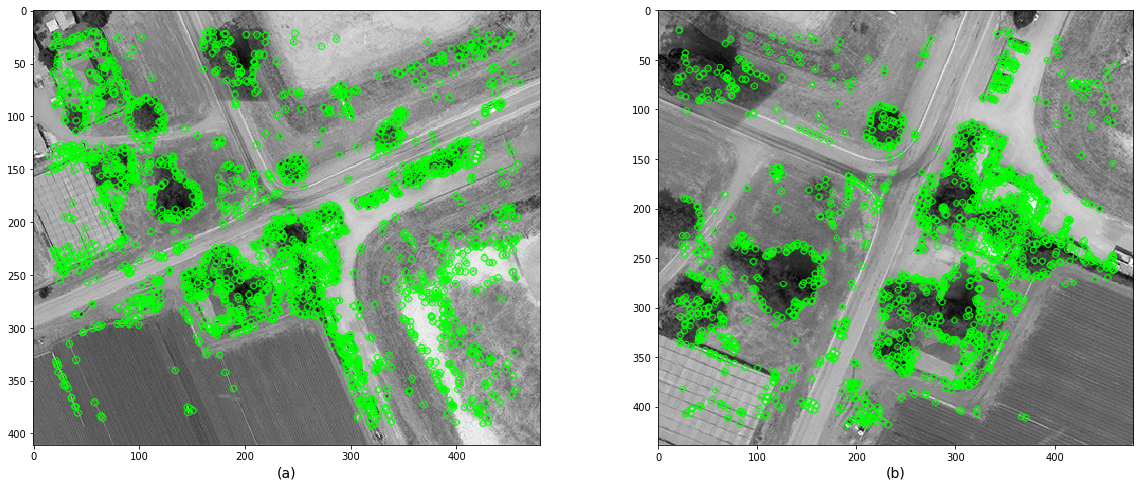

In [23]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(trainImg_gray,kpsA,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(queryImg_gray,kpsB,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

plt.savefig("./output/" + feature_extractor + "_features_img_"+str(imageId)+'.jpeg', bbox_inches='tight', 
            dpi=300, optimize=True, format='jpeg')
plt.show()

In [0]:
def createMatcher(method,crossCheck):
    "Create and return a Matcher Object"
    
    if method == 'sift' or method == 'surf':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=crossCheck)
    elif method == 'orb' or method == 'brisk':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=crossCheck)
    return bf

In [0]:
def matchKeyPointsBF(featuresA, featuresB, method):
    bf = createMatcher(method, crossCheck=True)
        
    # Match descriptors.
    best_matches = bf.match(featuresA,featuresB)
    
    # Sort the features in order of distance.
    # The points with small distance (more similarity) are ordered first in the vector
    rawMatches = sorted(best_matches, key = lambda x:x.distance)
    print("Raw matches (Brute force):", len(rawMatches))
    return rawMatches

In [0]:
def matchKeyPointsKNN(featuresA, featuresB, ratio, method):
    bf = createMatcher(method, crossCheck=False)
    # compute the raw matches and initialize the list of actual matches
    rawMatches = bf.knnMatch(featuresA, featuresB, 2)
    print("Raw matches (knn):", len(rawMatches))
    matches = []

    # loop over the raw matches
    for m,n in rawMatches:
        # ensure the distance is within a certain ratio of each
        # other (i.e. Lowe's ratio test)
        if m.distance < n.distance * ratio:
            matches.append(m)
    return matches

Using: bf feature matcher
Raw matches (Brute force): 1064


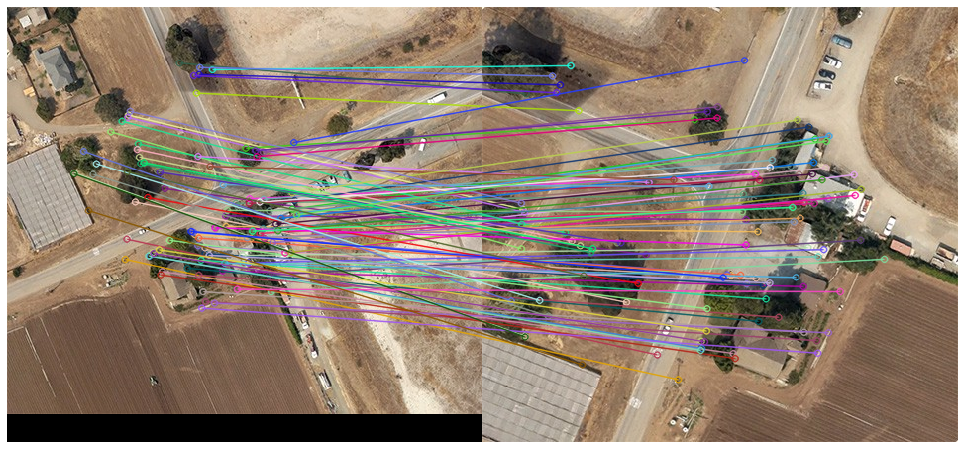

In [15]:
print("Using: {} feature matcher".format(feature_matching))

fig = plt.figure(figsize=(20,8))

if feature_matching == 'bf':
    matches = matchKeyPointsBF(featuresA, featuresB, method=feature_extractor)
    img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,matches[:100],
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
elif feature_matching == 'knn':
    matches = matchKeyPointsKNN(featuresA, featuresB, ratio=0.75, method=feature_extractor)
    img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,np.random.choice(matches,100),
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    

plt.imshow(img3)
plt.axis('off')
plt.savefig("./output/" + feature_matching + "_matching_img_"+str(imageId)+'.jpeg', bbox_inches='tight', 
            dpi=300, optimize=True, format='jpeg')
plt.show()

In [0]:
def getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh):
    # convert the keypoints to numpy arrays
    kpsA = np.float32([kp.pt for kp in kpsA])
    kpsB = np.float32([kp.pt for kp in kpsB])
    
    if len(matches) > 4:
        # construct the two sets of points
        ptsA = np.float32([kpsA[m.queryIdx] for m in matches])
        ptsB = np.float32([kpsB[m.trainIdx] for m in matches])
        
        # estimate the homography between the sets of points
        (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,
            reprojThresh)

        return (matches, H, status)
    else:
        return None

In [17]:
M = getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh=4)
if M is None:
    print("Error!")
(matches, H, status) = M
print(H)

[[ 1.15372507e+00  1.09503998e+00 -2.19183375e+02]
 [-1.09529426e+00  1.15486157e+00  2.12640936e+02]
 [-5.24959256e-06  3.15339148e-06  1.00000000e+00]]


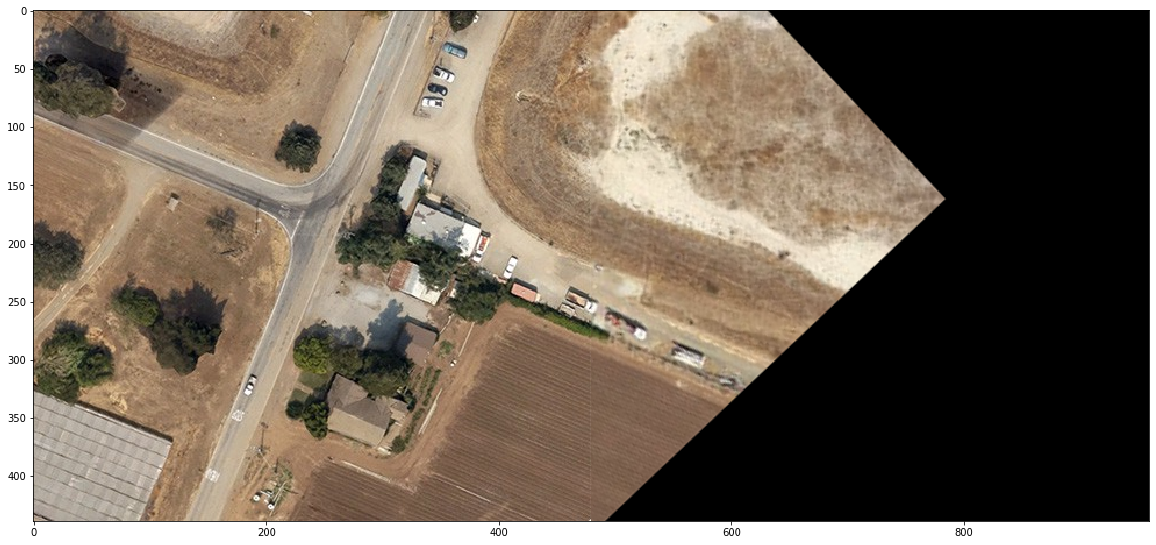

In [20]:
# Apply a horizontal panorama
width = queryImg.shape[1] + trainImg.shape[1]
height = max(queryImg.shape[0], trainImg.shape[0])
# otherwise, apply a perspective warp to stitch the images
# together
(matches, H, status) = M
result = cv2.warpPerspective(trainImg, H,
    (width, height))
result[0:queryImg.shape[0], 0:queryImg.shape[1]] = queryImg

plt.figure(figsize=(20,20))
plt.axis('on')
plt.imshow(result)

imageio.imwrite("./output/horizontal_panorama_img_"+str(imageId)+'.jpeg', result)
plt.show()

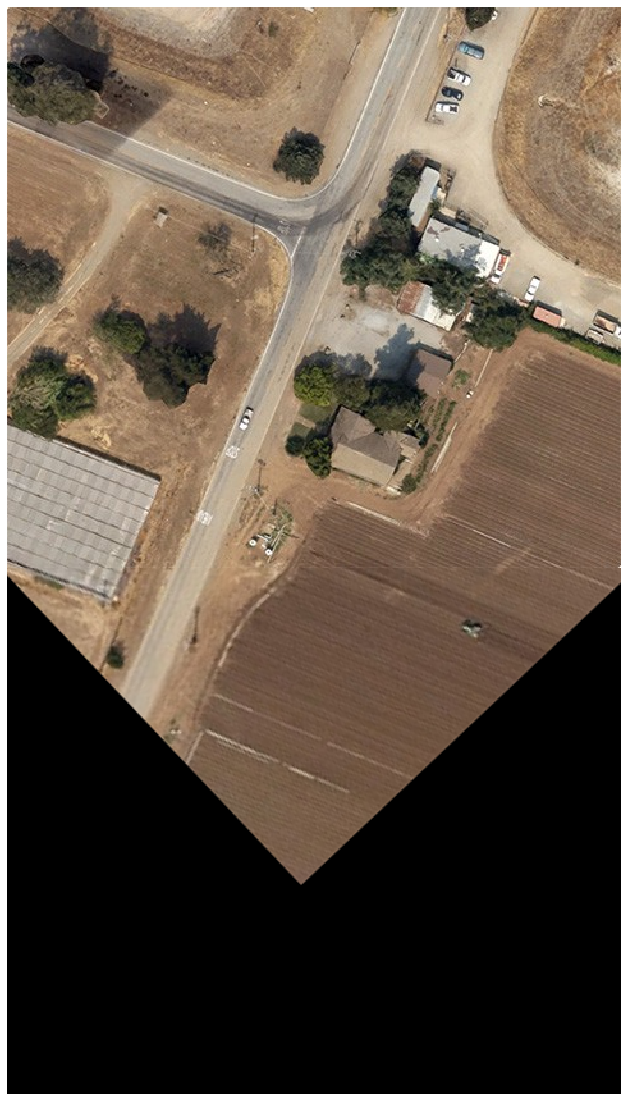

In [24]:
# Apply a vertical panorama
width = max(trainImg.shape[1], queryImg.shape[1])
height = trainImg.shape[0] + queryImg.shape[0]

result = cv2.warpPerspective(trainImg, H, (width, height))
result[0:queryImg.shape[0], :] = queryImg

plt.figure(figsize=(20,20))
plt.imshow(result)

imageio.imwrite("./output/vertical_panorama_img_"+str(imageId)+'.jpeg', result)

plt.axis('off')
plt.show()